In [2191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

# print((consumer3-solargen).mean(axis=0).min())
# print((consumer1).mean(axis=0).min())
# print((consumer1+chargingprofile1).var(axis=0).min())
# print((consumer2+chargingprofile1).var(axis=0).min())
# print((consumer3+chargingprofile1).var(axis=0).min())
# print((consumer1-solargen).var(axis=0).min())
# print((consumer2-solargen).var(axis=0).min())
# print((consumer3-solargen).var(axis=0).min())
# print((consumer1).var(axis=0).min())
# print((consumer2).var(axis=0).min())
# print((consumer3).var(axis=0).min())

Per day: 96x365 => 1x365

Statistical moments

-0.03583157894736842
0.02429473684210526
First difference
First difference
First difference


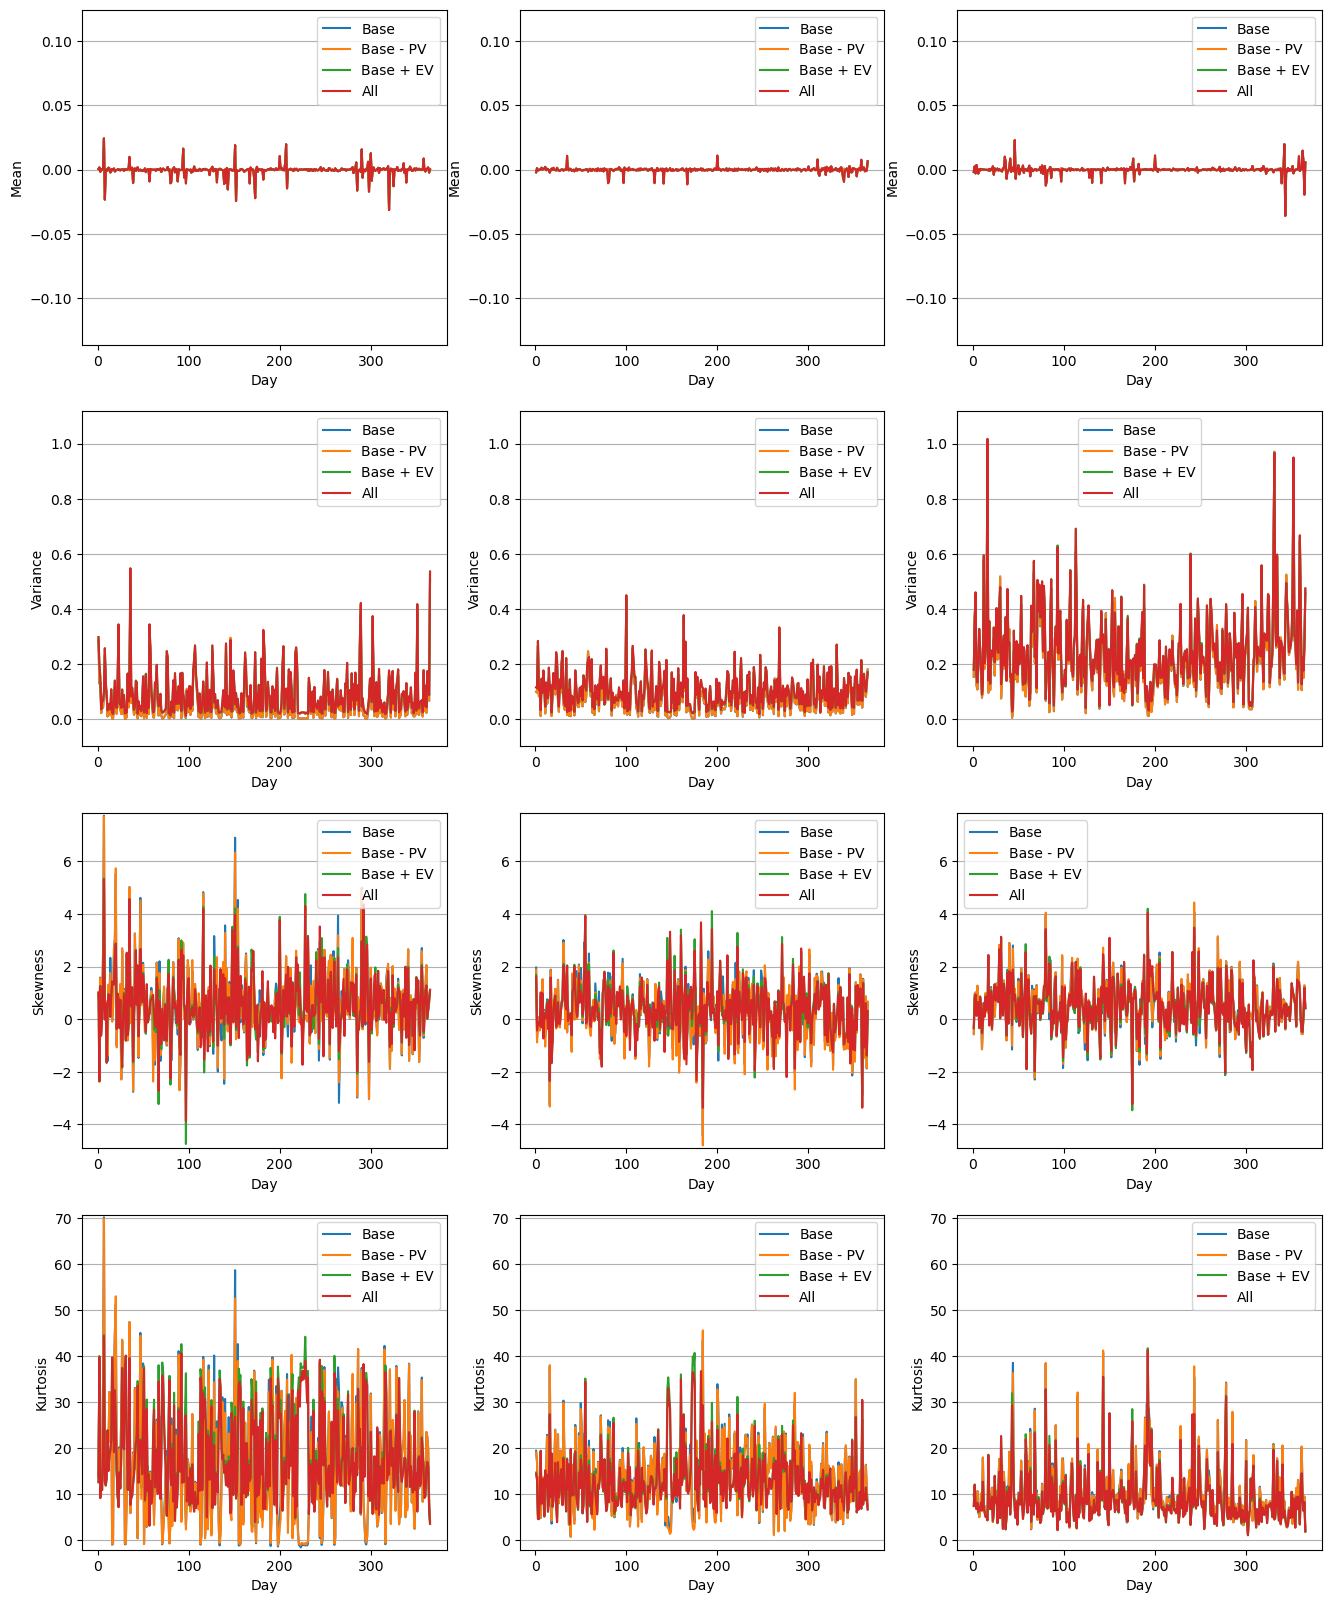

In [2192]:
# del min
# del max
# del mean
time_series = 0
first_difference = 1
second_difference = 0
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    if first_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
    #     net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
    #     net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
    #     consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=0), net_consumption_pv.mean(axis=0), net_consumption_ev.mean(axis=0)])
    all_vars.extend([consumer_profile.var(axis=0), net_consumption_pv.var(axis=0), net_consumption_ev.var(axis=0)])
    all_skews.extend([consumer_profile.skew(axis=0), net_consumption_pv.skew(axis=0), net_consumption_ev.skew(axis=0)])
    all_kurts.extend([consumer_profile.kurt(axis=0), net_consumption_pv.kurt(axis=0), net_consumption_ev.kurt(axis=0)])

# Calculate global min and max for each statistic
print(min(map(lambda x: x.min(), all_means)))
print(max(map(lambda x: x.max(), all_means)))
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    # First difference
    if first_difference == 1:
        print("First difference")
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).drop(net_consumption_all.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        print('Second difference')
        # net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        # net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:].diff().iloc[1:]
        # consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]

        net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_all.columns[0:2], axis=1)
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        print('Time series')
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen
        net_consumption_all = consumer_profile + chargingprofile - solargen
    
    axs[0,i].plot(consumer_profile.mean(axis=0), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=0), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=0), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=0), label = 'All')
    axs[0, i].set_ylim(mean_min-0.1, mean_max+0.1)
    axs[0,i].set_xlabel('Day')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=0), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=0), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=0), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=0), label = 'All')
    axs[1, i].set_ylim(var_min-0.1, var_max+0.1)
    axs[1,i].set_xlabel('Day')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=0), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=0), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=0), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=0), label = 'All')
    axs[2, i].set_ylim(skew_min-0.1, skew_max+0.1)
    axs[2,i].set_xlabel('Day')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=0), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=0), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=0), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=0), label = 'All')
    axs[3, i].set_ylim(kurt_min-0.5, kurt_max+0.5)
    axs[3,i].set_xlabel('Day')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')


In [2193]:
min=0
max=0
mean=1
print('MEAN')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).mean(axis=0).min())
    if max ==1:
        print((consumer_profile).mean(axis=0).max())
    if mean ==1:
        print((consumer_profile).mean(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption = (consumer_profile-solargen).diff().iloc[1:]
        #net_consumption = (consumer_profile-solargen).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        net_consumption = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption = consumer_profile - solargen

    if min==1:
        print(net_consumption.mean(axis=0).min())
    if max ==1:
        print((net_consumption).mean(axis=0).max())
    if mean ==1:
        print((net_consumption).mean(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption = consumer_profile+chargingprofile


    if min==1:
        print((net_consumption).mean(axis=0).min())
    if max ==1:
        print((net_consumption).mean(axis=0).max())
    if mean ==1:
        print((net_consumption).mean(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    
    if min==1:
        print((net_consumption1).mean(axis=0).min())
        print((net_consumption2).mean(axis=0).min())
        print((net_consumption3).mean(axis=0).min())
        print((net_consumption4).mean(axis=0).min())
    if max ==1:
        print((net_consumption1).mean(axis=0).max())
        print((net_consumption2).mean(axis=0).max())
        print((net_consumption3).mean(axis=0).max())
        print((net_consumption4).mean(axis=0).max())
    if mean ==1:
        print((net_consumption1).mean(axis=0).mean())
        print((net_consumption2).mean(axis=0).mean())
        print((net_consumption3).mean(axis=0).mean())
        print((net_consumption4).mean(axis=0).mean())

del min
del max
del mean


MEAN
Base
-0.00032830569574621485
-1.0382119682768436e-05
4.0490266762797345e-05


Base-pv
-0.00032830569574621485
-1.038211968276854e-05
4.049026676279728e-05


Base+ev
-0.0004482488183930147
-0.00013032524232956804
-7.945285588400237e-05


All
-0.0004482488183930146
-0.0004482488183930152
-0.0030869975166226077
-0.0030869975166226064
-0.00013032524232956804
-0.00013032524232956842
-0.002769073940559159
-0.0027690739405591613
-7.94528558840022e-05
-7.945285588400225e-05
-0.0027182015541135944
-0.0027182015541135944


In [2194]:
min=0
max=0
mean=1
print('variance')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).var(axis=0).min())
    if max ==1:
        print((consumer_profile).var(axis=0).max())
    if mean ==1:
        print((consumer_profile).var(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)

    if min==1:
        print(net_consumption1.var(axis=0).min())
        print(net_consumption2.var(axis=0).min())

    if max ==1:
        print(net_consumption1.var(axis=0).max())
        print(net_consumption2.var(axis=0).max())
    if mean ==1:
        print(net_consumption1.var(axis=0).mean())
        print(net_consumption2.var(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).var(axis=0).min())
        print((net_consumption2).var(axis=0).min())
    if max ==1:
        print((net_consumption1).var(axis=0).max())
        print((net_consumption2).var(axis=0).max())
    if mean ==1:
        print((net_consumption1).var(axis=0).mean())
        print((net_consumption2).var(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).var(axis=0).min())
        print((net_consumption2).var(axis=0).min())
        print((net_consumption3).var(axis=0).min())
        print((net_consumption4).var(axis=0).min())
    if max ==1:
        print((net_consumption1).var(axis=0).max())
        print((net_consumption2).var(axis=0).max())
        print((net_consumption3).var(axis=0).max())
        print((net_consumption4).var(axis=0).max())
    if mean ==1:
        print((net_consumption1).var(axis=0).mean())
        print((net_consumption2).var(axis=0).mean())
        print((net_consumption3).var(axis=0).mean())
        print((net_consumption4).var(axis=0).mean())

del min
del max
del mean


variance
Base
0.06840047031247602
0.08346541860988817
0.2304258400510267


Base-pv
0.06901019110712282
0.1256957429243128
0.08418213999811694
0.14183069715754473
0.23077425605952345
0.2851080648013632


Base+ev
0.0880003092729085
10.515476501452646
0.10309135462497622
10.531141682007137
0.25058021321923807
10.690256157970113


All
0.08862563005163575
0.14545158172554978
10.516445021881143
10.576359770402986
0.10382367599728544
0.16161263301343728
10.532217203029216
10.593094956893296
0.2509442292118153
0.30541843781037903
10.690963373612458
10.748526379058951


In [2195]:
min=0
max=1
mean=0
print('skewness')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).skew(axis=0).min())
    if max ==1:
        print((consumer_profile).skew(axis=0).max())
    if mean ==1:
        print((consumer_profile).skew(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]        
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)

    if min==1:
        print(net_consumption1.skew(axis=0).min())
        print(net_consumption2.skew(axis=0).min())

    if max ==1:
        print(net_consumption1.skew(axis=0).max())
        print(net_consumption2.skew(axis=0).max())
    if mean ==1:
        print(net_consumption1.skew(axis=0).mean())
        print(net_consumption2.skew(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]        
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).skew(axis=0).min())
        print((net_consumption2).skew(axis=0).min())
    if max ==1:
        print((net_consumption1).skew(axis=0).max())
        print((net_consumption2).skew(axis=0).max())
    if mean ==1:
        print((net_consumption1).skew(axis=0).mean())
        print((net_consumption2).skew(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).skew(axis=0).min())
        print((net_consumption2).skew(axis=0).min())
        print((net_consumption3).skew(axis=0).min())
        print((net_consumption4).skew(axis=0).min())
    if max ==1:
        print((net_consumption1).skew(axis=0).max())
        print((net_consumption2).skew(axis=0).max())
        print((net_consumption3).skew(axis=0).max())
        print((net_consumption4).skew(axis=0).max())
    if mean ==1:
        print((net_consumption1).skew(axis=0).mean())
        print((net_consumption2).skew(axis=0).mean())
        print((net_consumption3).skew(axis=0).mean())
        print((net_consumption4).skew(axis=0).mean())

del min
del max
del mean


skewness
Base
7.73428712279937
3.0132419570708096
4.085804038187828


Base-pv
7.7028440134680976
6.801722437346517
2.911087411028775
2.815744053499918
4.439991412132731
3.784371402085792


Base+ev
5.3499458321070295
9.723968243915586
4.112870017416855
9.705059129882532
4.201652568394271
9.279111088830073


All
5.319770076349491
4.713318950871029
9.722328741042897
9.536603967324977
3.929963081053707
2.7468451364440076
9.704707484217845
9.689680283744304
4.049941512895773
3.2489043476566377
9.275667414620253
9.233736627933737


In [2196]:
min=0
max=0
mean=1
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        # net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.kurt(axis=0).min())
        print(net_consumption2.kurt(axis=0).min())

    if max ==1:
        print(net_consumption1.kurt(axis=0).max())
        print(net_consumption2.kurt(axis=0).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=0).mean())
        print(net_consumption2.kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        print((net_consumption3).kurt(axis=0).min())
        print((net_consumption4).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
        print((net_consumption3).kurt(axis=0).max())
        print((net_consumption4).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
        print((net_consumption3).kurt(axis=0).mean())
        print((net_consumption4).kurt(axis=0).mean())

del min
del max
del mean


kurtosis
Base
15.751658511317705
10.348205078738932
6.375528861590621


Base-pv
12.653809884485481
2.7776998422559145
8.594517877196253
2.402880068896428
5.771076728996389
2.17705317925925


Base+ev
5.396814219662454
5.924882852463129
4.546723446912765
5.823134828247498
3.807043585091707
5.671007956867288


All
4.830817492142142
1.7250021062788943
5.947503065855509
5.47773670544785
4.082011927531356
1.5242999538791715
5.8134274085028395
5.40102051303834
3.62714671620655
1.7140042705962553
5.676286105100057
5.3062766177839435


Per quarter hour

In [2197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

-0.24712026959932787
0.29349155673938776
Second difference
Second difference
Second difference


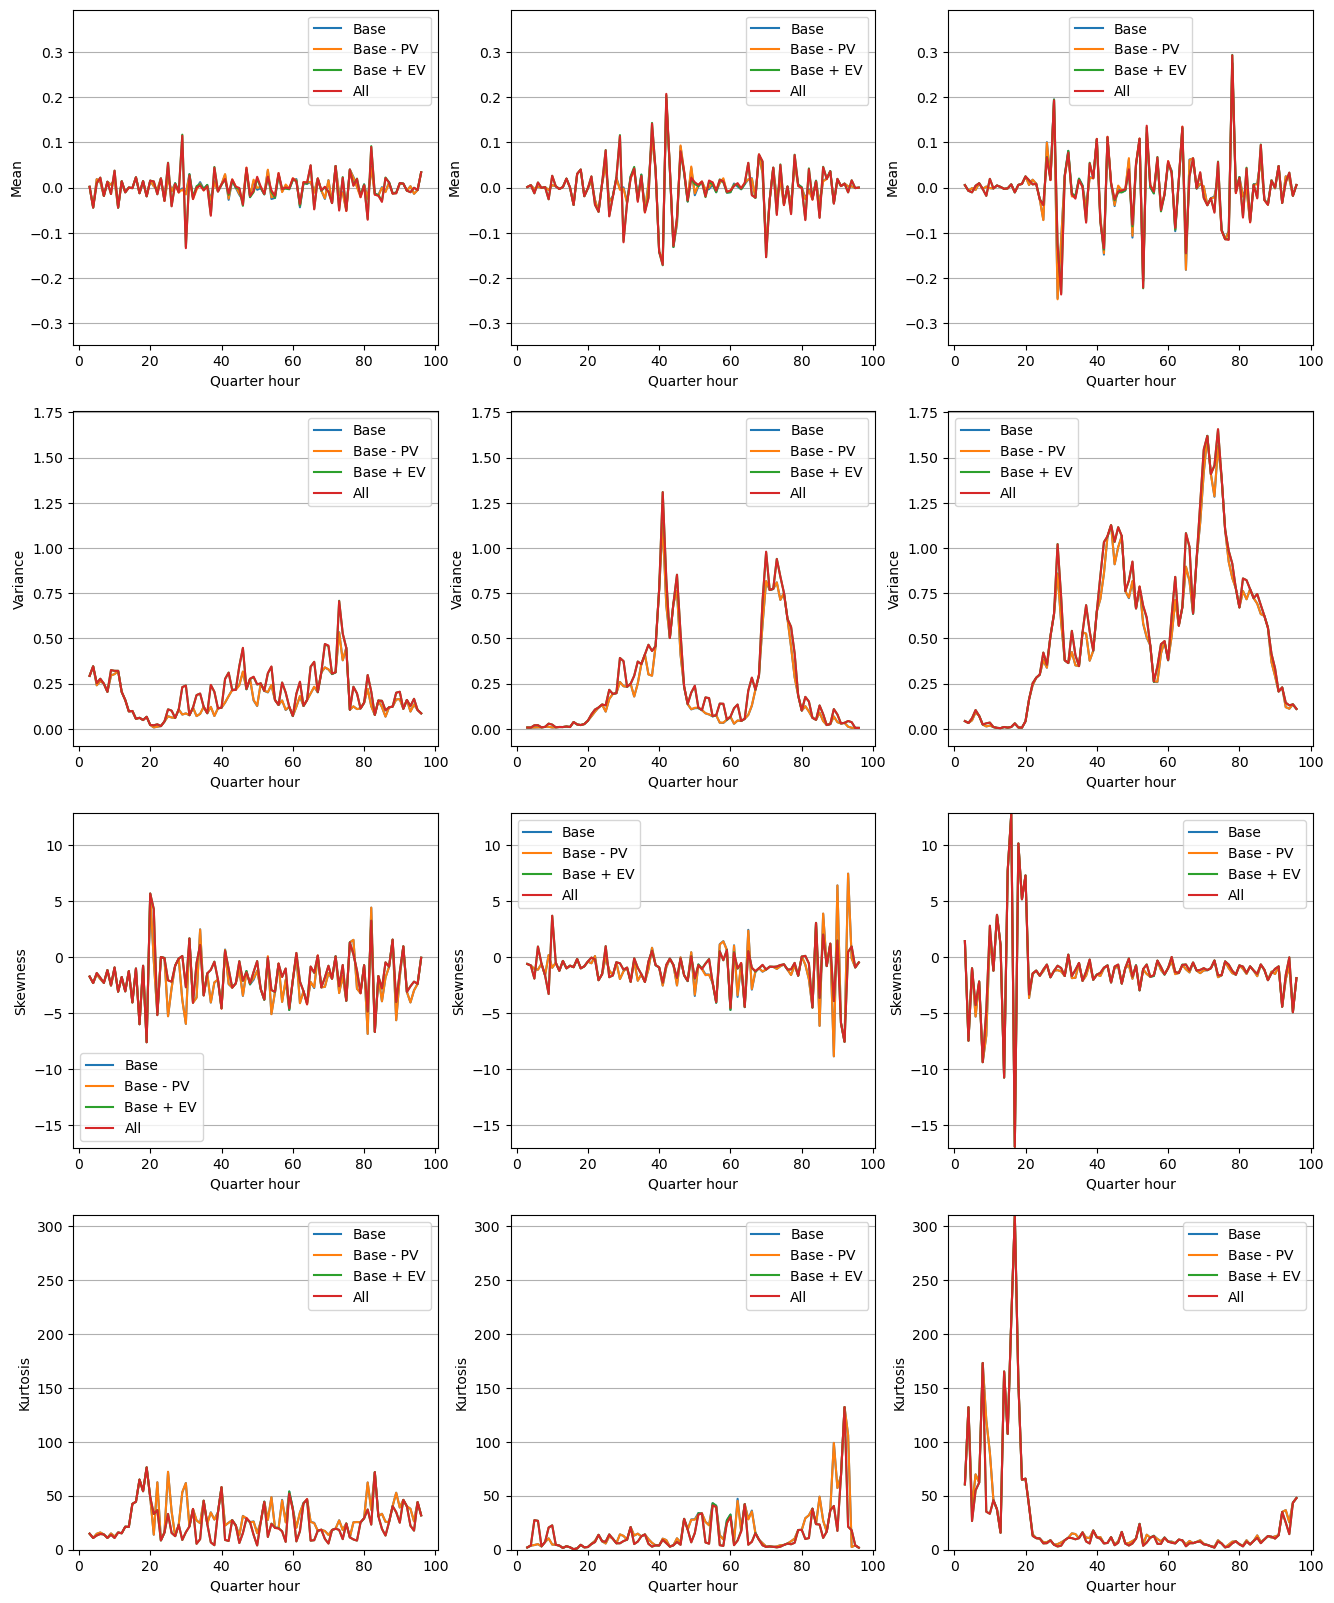

In [2198]:
# del min
# del max
# del mean
time_series = 0
first_difference = 0
second_difference = 1
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    if first_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=1), net_consumption_pv.mean(axis=1), net_consumption_ev.mean(axis=1)])
    all_vars.extend([consumer_profile.var(axis=1), net_consumption_pv.var(axis=1), net_consumption_ev.var(axis=1)])
    all_skews.extend([consumer_profile.skew(axis=1), net_consumption_pv.skew(axis=1), net_consumption_ev.skew(axis=1)])
    all_kurts.extend([consumer_profile.kurt(axis=1), net_consumption_pv.kurt(axis=1), net_consumption_ev.kurt(axis=1)])

# Calculate global min and max for each statistic
print(min(map(lambda x: x.min(), all_means)))
print(max(map(lambda x: x.max(), all_means)))
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    # First difference
    if first_difference == 1:
        print("First difference")
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).drop(net_consumption_all.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff().iloc[1:]

    if second_difference == 1:
        print('Second difference')
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_all.columns[0:2], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        print('Time series')
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen
        net_consumption_all = consumer_profile + chargingprofile - solargen
    
    axs[0,i].plot(consumer_profile.mean(axis=1), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=1), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=1), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=1), label = 'All')
    axs[0, i].set_ylim(mean_min-0.1, mean_max+0.1)
    axs[0,i].set_xlabel('Quarter hour')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=1), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=1), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=1), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=1), label = 'All')
    axs[1, i].set_ylim(var_min-0.1, var_max+0.1)
    axs[1,i].set_xlabel('Quarter hour')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=1), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=1), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=1), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=1), label = 'All')
    axs[2, i].set_ylim(skew_min-0.1, skew_max+0.1)
    axs[2,i].set_xlabel('Quarter hour')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=1), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=1), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=1), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=1), label = 'All')
    axs[3, i].set_ylim(kurt_min-0.5, kurt_max+0.5)
    axs[3,i].set_xlabel('Quarter hour')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')


In [2199]:
min=0
max=0
mean=1
print('MEAN')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).mean(axis=1).min())
    if max ==1:
        print((consumer_profile).mean(axis=1).max())
    if mean ==1:
        print((consumer_profile).mean(axis=1).mean())
print('\n')

print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption = (consumer_profile-solargen).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption = consumer_profile-solargen

    if min==1:
        print(net_consumption.mean(axis=1).min())
    if max ==1:
        print((net_consumption).mean(axis=1).max())
    if mean ==1:
        print((net_consumption).mean(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption = consumer_profile+chargingprofile

    if min==1:
        print((net_consumption).mean(axis=1).min())
    if max ==1:
        print((net_consumption).mean(axis=1).max())
    if mean ==1:
        print((net_consumption).mean(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen

    if min==1:
        print((net_consumption1).mean(axis=1).min())
        print((net_consumption2).mean(axis=1).min())
        print((net_consumption3).mean(axis=1).min())
        print((net_consumption4).mean(axis=1).min())
    if max ==1:
        print((net_consumption1).mean(axis=1).max())
        print((net_consumption2).mean(axis=1).max())
        print((net_consumption3).mean(axis=1).max())
        print((net_consumption4).mean(axis=1).max())
    if mean ==1:
        print((net_consumption1).mean(axis=1).mean())
        print((net_consumption2).mean(axis=1).mean())
        print((net_consumption3).mean(axis=1).mean())
        print((net_consumption4).mean(axis=1).mean())

del min
del max
del mean


MEAN
Base
0.0005356978879706157
0.0006999540863177226
0.00029545454545454596


Base-pv
0.0004534232775919599
0.0012782165942107763
0.00021317993507589104


Base+ev
0.00025137862932184444
0.0005965951603577867
0.0008715309838924823


All
-4.204219466180919e-05
-0.0004423871092945953
-0.0025332390775483606
-0.002933583992181166
0.001654285938688606
0.0011344224623925086
-0.0031815668339735506
-0.0037014303102696406
0.000660305871636534
0.0002599609570037491
-0.001830891011250037
-0.002231235925882796


In [2200]:
min=0
max=0
mean=1
print('variance')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).var(axis=1).min())
    if max ==1:
        print((consumer_profile).var(axis=1).max())
    if mean ==1:
        print((consumer_profile).var(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    
    if min==1:
        print(net_consumption1.var(axis=1).min())
        print(net_consumption2.var(axis=1).min())

    if max ==1:
        print(net_consumption1.var(axis=1).max())
        print(net_consumption2.var(axis=1).max())
    if mean ==1:
        print(net_consumption1.var(axis=1).mean())
        print(net_consumption2.var(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).var(axis=1).min())
        print((net_consumption2).var(axis=1).min())
    if max ==1:
        print((net_consumption1).var(axis=1).max())
        print((net_consumption2).var(axis=1).max())
    if mean ==1:
        print((net_consumption1).var(axis=1).mean())
        print((net_consumption2).var(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profil+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).var(axis=1).min())
        print((net_consumption2).var(axis=1).min())
        print((net_consumption3).var(axis=1).min())
        print((net_consumption4).var(axis=1).min())
    if max ==1:
        print((net_consumption1).var(axis=1).max())
        print((net_consumption2).var(axis=1).max())
        print((net_consumption3).var(axis=1).max())
        print((net_consumption4).var(axis=1).max())
    if mean ==1:
        print((net_consumption1).var(axis=1).mean())
        print((net_consumption2).var(axis=1).mean())
        print((net_consumption3).var(axis=1).mean())
        print((net_consumption4).var(axis=1).mean())

del min
del max
del mean


variance
Base
0.3981916089168937
0.5414384783038825
1.5325029072513885


Base-pv
0.4382526992858126
4.711648956659051
0.5893387393671433
4.926357504136662
1.5730907189685812
5.873855091551602


Base+ev
0.7943085949362109
209.51344159104818
0.9401354992998071
209.34399882671497
1.924265330225514
210.55887352924685


All
0.8408219516089762
5.169935733924146
209.27386071190062
214.82876004293826
0.9957067506684529
5.3884282192320105
209.92042823326665
215.53860918529904
1.9734664632866092
6.329948360811561
210.35824804746528
215.9405154937127


In [2201]:
min=0
max=1
mean=0
print('skewness')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        #plt.plot(consumer_profile.skew(axis=1))

    if min==1:
        print((consumer_profile).skew(axis=1).min())
    if max ==1:
        print((consumer_profile).skew(axis=1).max())
    if mean ==1:
        print((consumer_profile).skew(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.skew(axis=1).min())
        print(net_consumption2.skew(axis=1).min())

    if max ==1:
        print(net_consumption1.skew(axis=1).max())
        print(net_consumption2.skew(axis=1).max())
    if mean ==1:
        print(net_consumption1.skew(axis=1).mean())
        print(net_consumption2.skew(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)

    if min==1:
        print((net_consumption1).skew(axis=1).min())
        print((net_consumption2).skew(axis=1).min())
    if max ==1:
        print((net_consumption1).skew(axis=1).max())
        print((net_consumption2).skew(axis=1).max())
    if mean ==1:
        print((net_consumption1).skew(axis=1).mean())
        print((net_consumption2).skew(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).skew(axis=1).min())
        print((net_consumption2).skew(axis=1).min())
        print((net_consumption3).skew(axis=1).min())
        print((net_consumption4).skew(axis=1).min())
    if max ==1:
        print((net_consumption1).skew(axis=1).max())
        print((net_consumption2).skew(axis=1).max())
        print((net_consumption3).skew(axis=1).max())
        print((net_consumption4).skew(axis=1).max())
    if mean ==1:
        print((net_consumption1).skew(axis=1).mean())
        print((net_consumption2).skew(axis=1).mean())
        print((net_consumption3).skew(axis=1).mean())
        print((net_consumption4).skew(axis=1).mean())

del min
del max
del mean


skewness
Base
-0.6529024910613488
2.132457751359231
-0.3980797002645596


Base-pv
-0.6507690963315025
-0.16574223278210976
2.130978074077365
2.132270829722261
-0.3963909066826076
-0.1513718584475683


Base+ev
-0.4129984167919393
-0.5387630576671616
-0.25523989803596553
-0.5153086352288568
-0.37447677001367624
-0.5378293218170966


All
-0.38442910939572994
-0.12537297155042373
-0.5156408355742904
-0.5030855524952673
-0.22932601113340725
-0.10909740654851145
-0.5263171681894578
-0.5080148068269954
-0.35887695383604673
-0.13756623845700316
-0.5298425860299837
-0.5151883061649761


In [2202]:
min=0
max=1
mean=0
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).kurt(axis=1).min())
    if max ==1:
        print((consumer_profile).kurt(axis=1).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.kurt(axis=1).min())
        print(net_consumption2.kurt(axis=1).min())

    if max ==1:
        print(net_consumption1.kurt(axis=1).max())
        print(net_consumption2.kurt(axis=1).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=1).mean())
        print(net_consumption2.kurt(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)

    if min==1:
        print((net_consumption1).kurt(axis=1).min())
        print((net_consumption2).kurt(axis=1).min())
    if max ==1:
        print((net_consumption1).kurt(axis=1).max())
        print((net_consumption2).kurt(axis=1).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=1).mean())
        print((net_consumption2).kurt(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).kurt(axis=1).min())
        print((net_consumption2).kurt(axis=1).min())
        print((net_consumption3).kurt(axis=1).min())
        print((net_consumption4).kurt(axis=1).min())
    if max ==1:
        print((net_consumption1).kurt(axis=1).max())
        print((net_consumption2).kurt(axis=1).max())
        print((net_consumption3).kurt(axis=1).max())
        print((net_consumption4).kurt(axis=1).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=1).mean())
        print((net_consumption2).kurt(axis=1).mean())
        print((net_consumption3).kurt(axis=1).mean())
        print((net_consumption4).kurt(axis=1).mean())

del min
del max
del mean


kurtosis
Base
65.75723543382115
50.625008591842025
83.87130798847765


Base-pv
65.38509182039824
63.259451583997404
50.50015079315665
50.50015079315665
83.63383840014488
83.63383840014488


Base+ev
59.72639214546042
170.75700440986813
37.10348260628342
170.91798214645735
57.2915546119078
173.04896095384868


All
59.73042890267858
59.73042890267858
170.76018499850284
170.76018499850284
37.31283354660175
37.31283354660175
170.91579377020415
170.91579377020415
57.29414903975477
57.29414903975477
173.04810360414757
173.04810360414757


OLD CODE

In [2203]:
min=0
max=0
mean=0
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-10*solargen).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

    if min==1:
        print(net_consumption1.kurt(axis=0).min())
        print(net_consumption2.kurt(axis=0).min())

    if max ==1:
        print(net_consumption1.kurt(axis=0).max())
        print(net_consumption2.kurt(axis=0).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=0).mean())
        print(net_consumption2.kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        print((net_consumption3).kurt(axis=0).min())
        print((net_consumption4).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
        print((net_consumption3).kurt(axis=0).max())
        print((net_consumption4).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
        print((net_consumption3).kurt(axis=0).mean())
        print((net_consumption4).kurt(axis=0).mean())

kurtosis
Base


Base-pv


Base+ev


All


In [2204]:
min=0
max=0
mean=1
print('KURTOSIS')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')

print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile-solargen).kurt(axis=0).min())
        print((consumer_profile-solargen*10).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile-solargen).kurt(axis=0).max())
        print((consumer_profile-solargen*10).kurt(axis=0).max())

    if mean ==1:
        print((consumer_profile-solargen).kurt(axis=0).mean())
        print((consumer_profile-solargen*10).kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).min())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).min())

    if max ==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).max())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).max())

    if mean ==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).mean())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).min())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).min())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).min())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).max())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).max())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).max())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).mean())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).mean())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).mean())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).mean())
del min
del max
del mean

KURTOSIS
Base
17.55081549050943
11.776569391755036
5.525943769769325


Base-pv
7.852278343940065
0.3692902047939177
5.173892926676303
0.20591403151515536
5.3768707298467096
0.6479304360499006


Base+ev
8.001634891940247
10.591322508657932
6.077005277727625
10.546515263237922
3.2688710566915824
10.252651110318075


All
4.2534377535586225
0.3777213655459315
10.558898164897439
7.256096869711909
3.5332820746308355
0.13779666520080003
10.517870486645315
7.262575775235312
3.609810349709374
0.4922850992704517
10.313417851777254
7.5975035971989


Per quarter hour: 96x365 => 96x1

In [2205]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

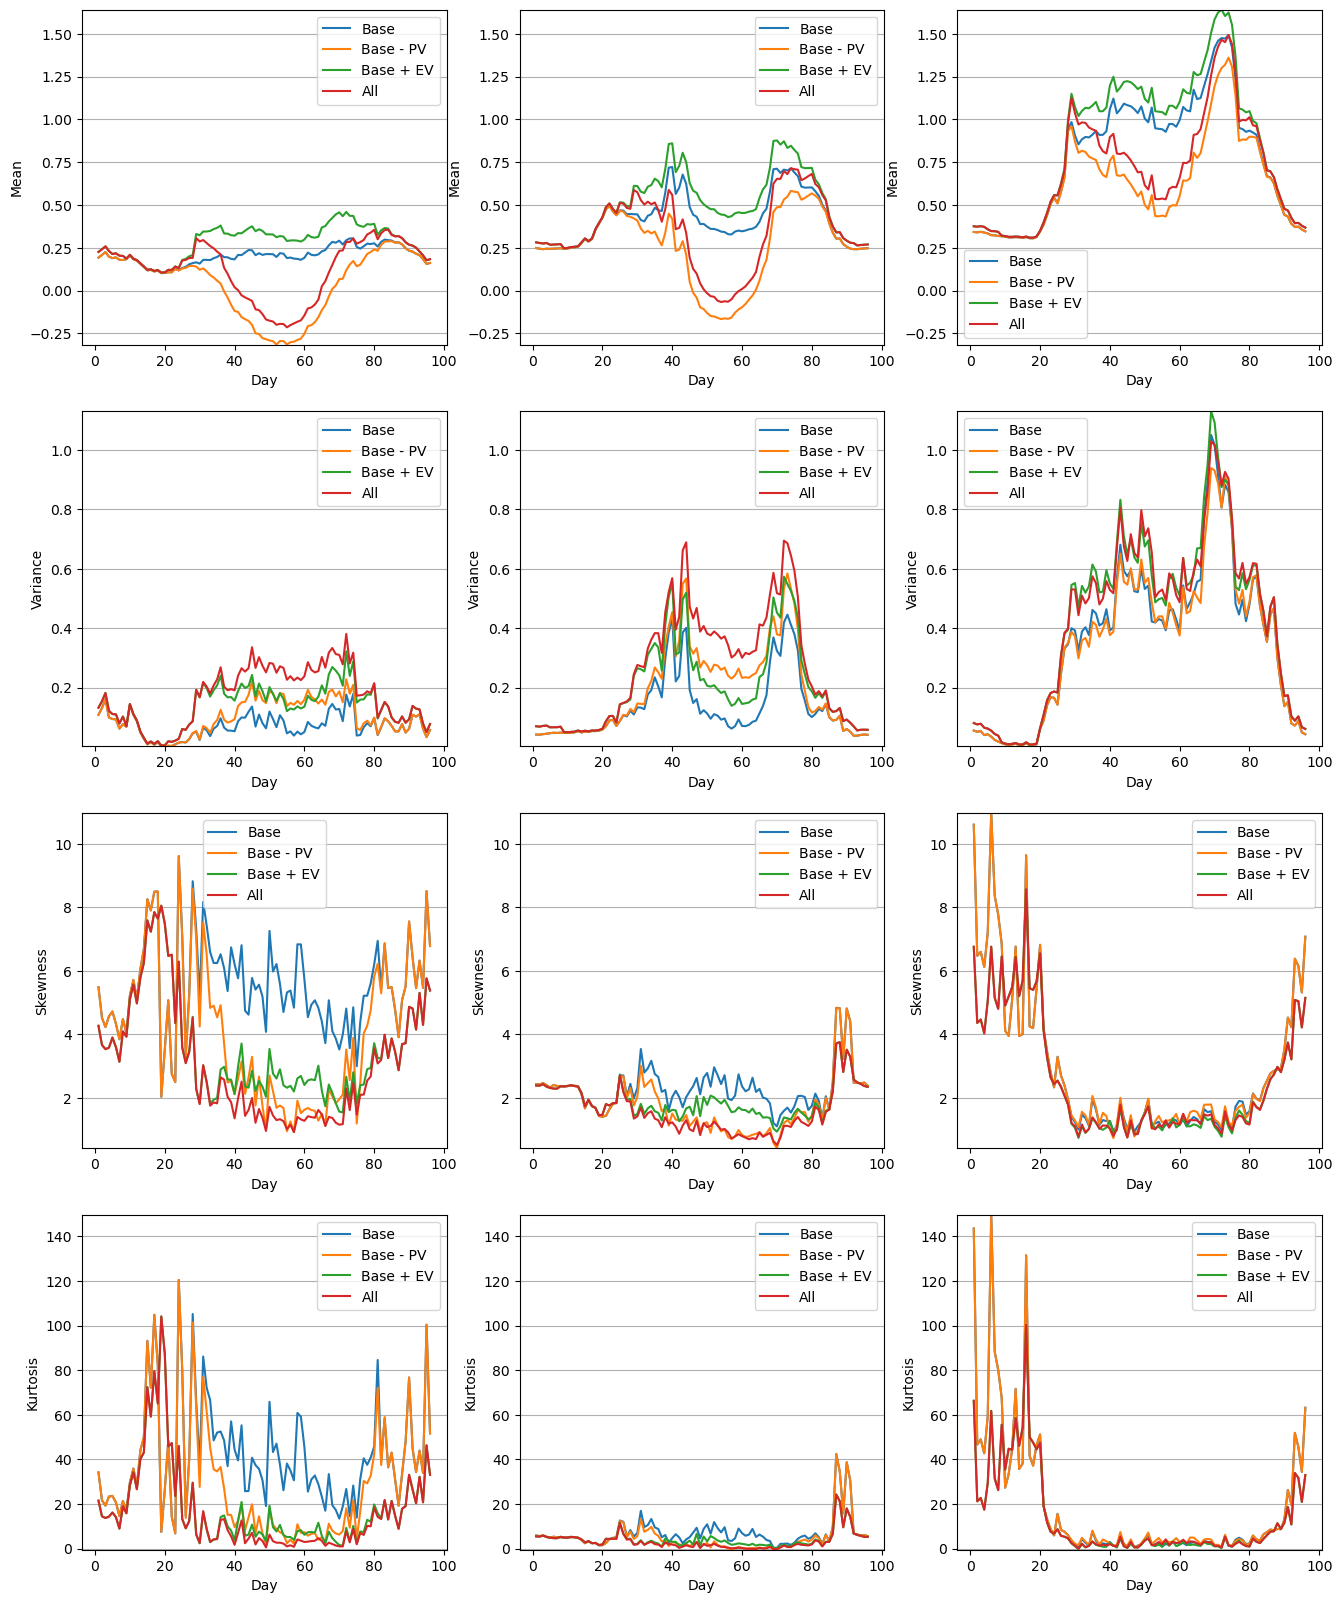

In [2206]:
first_difference = 0
second_difference = 0
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

results_mean = {0: [], 1: [], 2: []}
results_var = {0: [], 1: [], 2: []}
results_skew = {0: [], 1: [], 2: []}
results_kurt = {0: [], 1: [], 2: []}

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    net_consumption_ev = consumer_profile + chargingprofile
    net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=1), net_consumption_pv.mean(axis=1), net_consumption_ev.mean(axis=1)])
    all_vars.extend([consumer_profile.var(axis=1), net_consumption_pv.var(axis=1), net_consumption_ev.var(axis=1)])
    all_skews.extend([consumer_profile.skew(axis=1), net_consumption_pv.skew(axis=1), net_consumption_ev.skew(axis=1)])
    all_kurts.extend([consumer_profile.kurt(axis=1), net_consumption_pv.kurt(axis=1), net_consumption_ev.kurt(axis=1)])

# Calculate global min and max for each statistic
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    net_consumption_ev = consumer_profile + chargingprofile
    net_consumption_pv = consumer_profile - solargen
    net_consumption_all = consumer_profile + chargingprofile - solargen

    # First difference
    if first_difference == 1:
        #net_consumption = net_consumption.diff().iloc[1:]
        net_consumption = net_consumption.diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = net_consumption.diff().iloc[1:].diff().iloc[1:]
        net_consumption = net_consumption.diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)

    axs[0,i].plot(consumer_profile.mean(axis=1), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=1), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=1), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=1), label = 'All')
    axs[0, i].set_ylim(mean_min, mean_max)
    axs[0,i].set_xlabel('Day')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=1), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=1), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=1), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=1), label = 'All')
    axs[1, i].set_ylim(var_min, var_max)
    axs[1,i].set_xlabel('Day')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=1), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=1), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=1), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=1), label = 'All')
    axs[2, i].set_ylim(skew_min, skew_max)
    axs[2,i].set_xlabel('Day')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=1), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=1), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=1), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=1), label = 'All')

    axs[3, i].set_ylim(kurt_min, kurt_max)

    axs[3,i].set_xlabel('Day')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')
